In [1]:
# first compile the c modules where the model depends on
from  explain_core.ModulesCompiler import compile_modules;
compile_modules()

# import the model engine and the model interface
from explain_core.ModelEngine import ModelEngine
from explain_core.helpers.Interface import Interface

# instantiate a model engine instance with the 'normal_neonate' model definition
model = ModelEngine("normal_neonate.json")

# get a reference to all the submodels
models = model.models

# instantiate an interface object to interact with the model engine instance
neo = Interface(model)

# enable or disable the physiological submodels
neo.ans(True)
neo.breathing(True)
neo.metabolism(True)
neo.mob(True)

# desiable the extra-corporeal models
neo.placenta(False)
neo.ventilator(False)
neo.ecls(False)
neo.artificial_whomb(False)

# ----------------------------------------------------------------------------------------------------
# BLOOD PRESSURE EFFECTS
models["Ans"].min_baro = 20.0
models["Ans"].set_baro = 57.5
models["Ans"].max_baro = 100.0

# target vector: heart_rate
models["Ans"].heart_rate_ref = 140.0
models["Ans"].g_map_hp = -1.88              
models["Ans"].tc_map_hp = 2.0
# hypotension   = (20 - 57.5)  * -1.88 = 70.5 + heart_rate_ref      (max heart_rate 210.5 bpm)
# hypertension  = (100 - 57.5) * -1.88 = -79.9 + heart_rate_ref     (min heart_rate 60.1 bpm)

# target vector: u_vol -> venous pool
models["Ans"].g_map_ven_pool = 0.0267    
models["Ans"].tc_map_ven_pool = 60.0
# hypotension   = (20 - 57.5)  * 0.0267 = -1.0 - ven_pool_ref       (max decrease of u_vol by factor 2.0)
# hypertension  = (100 - 57.5) * 0.0267 = 1.13 + ven_pool_ref       (max increase of u_vol by factor 2.13)

# target vector: el_max -> contractility
models["Ans"].g_map_cont = -0.013       
models["Ans"].tc_map_cont = 15.0
# hypotension   = (20 - 57.5)  * -0.013 = 0.50 + cont_ref           (max increase of el_max by factor 1.5)
# hypertension  = (100 - 57.5) * -0.013 = -0.56 - conr_ref          (max decrease of el_max by factor 1.56)

# target vector: r_for and r_back -> systemic vascular resistance
models["Ans"].g_map_svr = -0.0267
models["Ans"].tc_map_svr = 30.0
# hypotension   = (20 - 57.5)  * -0.0267 = 1.0 + svr_ref            (max increase of r_ans by factor 2.0)
# hypertension  = (100 - 57.5) * -0.0267 = -1.13 - svr_ref          (max decrease of r_ans by factor 2.13)

# ----------------------------------------------------------------------------------------------------
#PCO2 EFFECTS
models["Ans"].min_pco2 = 15.0
models["Ans"].set_pco2 = 35
models["Ans"].max_pco2 = 75.0
models["Ans"].minute_volume_ref = 0.66

# target vector : target_minute_volume
models["Ans"].g_pco2_ve = 0.02  
models["Ans"].tc_pco2_ve = 12.0
# hypocapnia    = (15 - 35) * 0.02 = -0.4 + minute_volume_ref   (minimal mv 0.26 l/min)
# hypercapnia   = (75 - 35) * 0.02 = 0.8  + minute_volume_ref   (maximal mv 1.46 l/min)

# target vector: heart_rate
models["Ans"].g_pco2_hp = 0.25  
models["Ans"].tc_pco2_hp = 60.0
# hypocapnia    = (15 - 35) * 0.25 = -5                         (max decrease of heartrate by 5 bpm )
# hypercapnia   = (75 - 35) * 0.25 = 10                         (max increase of heartrate by 10 bpm )

# target vector: el_max -> contractility -> no effect
models["Ans"].g_pco2_cont = 0  
models["Ans"].tc_pco2_cont = 10.0

# target vector: u_vol -> venous pool -> no effect
models["Ans"].g_pco2_venpool = 0 #0.0      
models["Ans"].tc_pco2_venpool = 10.0

# target vector: r_for and r_back -> systemic vascular resistance -> no effect
models["Ans"].g_pco2_svr = -0.0375       
models["Ans"].tc_pco2_svr = 10.0
# hypocapnia    = (15 - 35) * -0.0375 = -0.75                    (max increase of svr by factor 1.75)
# hypercapnia   = (75 - 35) * -0.0375 = 1.5                      (max decrease of svr by factor 2.5)

# target vector: r_for and r_back -> pulmonary vascular resistance
models["Ans"].g_pco2_pvr = 0.0375      
models["Ans"].tc_pco2_pvr = 10.0
# hypocapnia    = (15 - 35) * 0.0375 = -0.75                     (max decrease of pvr by factor 1.75)
# hypercapnia   = (75 - 35) * 0.0375 = 1.5                       (max increase of pvr by factor 2.5)

# ----------------------------------------------------------------------------------------------------
# PH EFFECTS
models["Ans"].min_ph = 6.9
models["Ans"].set_ph = 7.4
models["Ans"].max_ph = 7.7

# target vector : target_minute_volume
models["Ans"].g_ph_ve = -1.5
models["Ans"].tc_ph_ve = 10.0
# acidosis    = (6.9 - 7.4) * -1.5 = 0.75 + minute_volume_ref   (maximal mv 1.41 l/min)
# alkalosis   = (7.7 - 7.4) * -1.5 = -0.45 + minute_volume_ref  (minimal mv 0.21 l/min)

# target vector: heart_rate -> no effect
models["Ans"].g_ph_hp = 0.0
models["Ans"].tc_ph_hp = 10.0

# target vector: el_max -> contractility
models["Ans"].g_ph_cont = 0.4 
models["Ans"].tc_ph_cont = 10.0
# acidosis    = (6.9 - 7.4) * 0.4 = -0.20 - cont_ref            (max decrease of el_max by factor 1.20)
# alkalosis   = (7.7 - 7.4) * 0.4 = -0.12 + cont_ref            (max increase of el_max by factor 1.12)

# target vector: u_vol -> venous pool -> no effect
models["Ans"].g_ph_venpool = 0 #0.0      
models["Ans"].tc_ph_venpool = 10.0

# target vector: r_for and r_back -> systemic vascular resistance
models["Ans"].g_ph_svr = 0.4       
models["Ans"].tc_ph_svr = 10.0
# acidosis    = (6.9 - 7.4) * 0.4 = -0.20 - svr_ref             (max decrease of svr by factor 1.20)
# alkalosis   = (7.7 - 7.4) * 0.4 = -0.12 + svr_ref             (max increase of svr by factor 1.12)

# target vector: r_for and r_back -> pulmonary vascular resistance
models["Ans"].g_ph_pvr = -0.4      
models["Ans"].tc_ph_pvr = 10.0
# acidosis    = (6.9 - 7.4) * -0.4 = 0.20 - cont_ref            (max increase of pvr by factor 1.20)
# alkalosis   = (7.7 - 7.4) * -0.4 = -0.12 + cont_ref           (max decrease of pvr by factor 1.12)

# ----------------------------------------------------------------------------------------------------
#PO2 EFFECTS
models["Ans"].min_po2 = 30.0
models["Ans"].set_po2 = 80.0
models["Ans"].max_po2 = 103.0

models["Ans"].g_po2_ve = -0.0068     
models["Ans"].tc_po2_ve = 10.0
# hypoxia   = (30 - 80) * -0.0068  = 0.34 + minute_volume_ref   (maximal mv 1 l/min)
# hyperoxia = (103 - 80) * -0.0068 = -0.16  + minute_volume_ref (minimal mv 0.5 l/min)

# target vector: heart_rate -> no effect
models["Ans"].g_po2_hp = -0.2     
models["Ans"].tc_po2_hp = 10.0

# target vector: el_max -> contractility -> no effect
models["Ans"].g_po2_cont = 0.0      
models["Ans"].tc_po2_cont = 10.0

# target vector: u_vol -> venous pool -> no effect
models["Ans"].g_po2_venpool = 0 #0.0      
models["Ans"].tc_po2_venpool = 10.0

# target vector: r_for and r_back -> systemic vascular resistance
models["Ans"].g_po2_svr = 0.03       
models["Ans"].tc_po2_svr = 10.0
# hypoxia   = (30 - 80)  * 0.03 = -1.5                      (max decrease of svr by factor 2.5)
# hyperoxia = (103 - 80) * 0.03 = 0.69                      (max increase of svr by factor 1.69)

# target vector: r_for and r_back -> pulmonary vascular resistance
models["Ans"].g_po2_pvr = -0.03      
models["Ans"].tc_po2_pvr = 10.0
# hypoxia   = (30 - 80)  * -0.03  = 1.5                     (max increase of pvr by factor 2.5)
# hyperoxia = (103 - 80) * -0.03 = -0.69                    (max decrease of pvr by factor 1.69)


 Model 'normal neonate' loaded and initialized correctly.


 Ready in 4.0 sec. Average model step in 0.0333 ms.


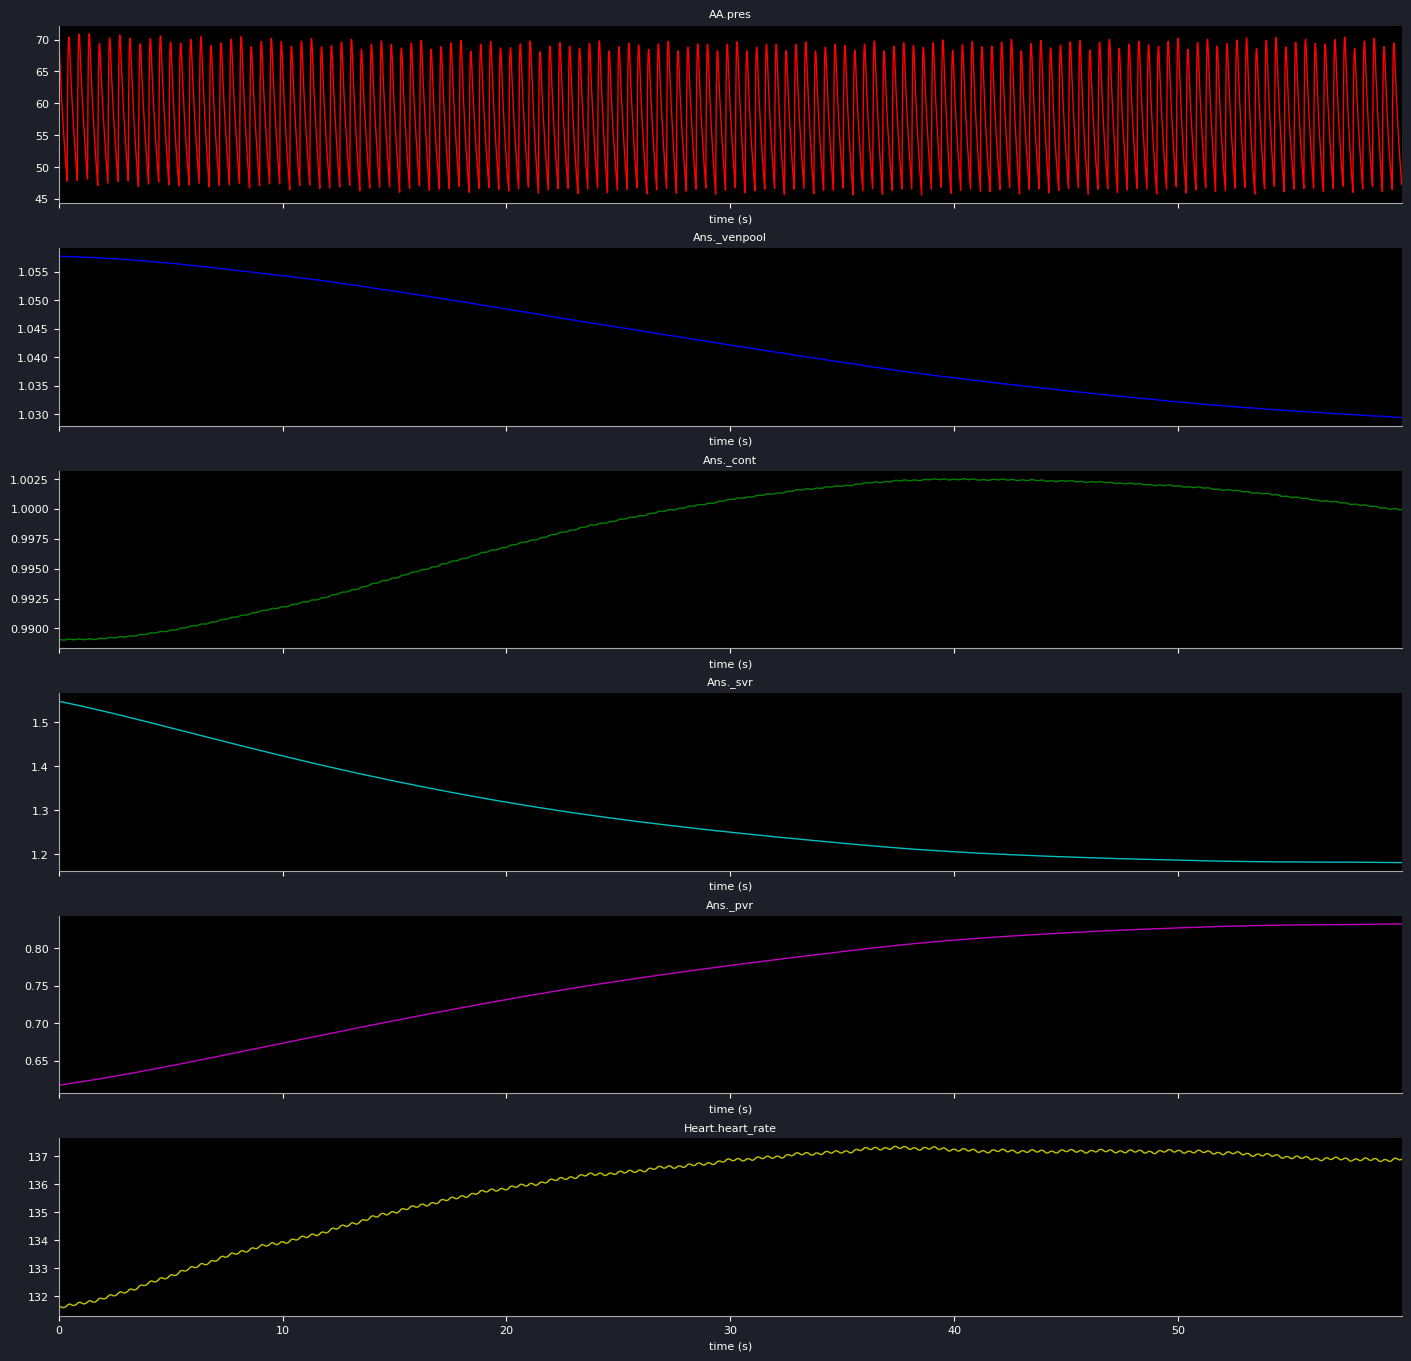


AA.pres         : max   70.91758, min   45.59388 mmHg
Ans._venpool    : max     1.0577 min    1.02943
Ans._cont       : max    1.00251 min    0.98903
Ans._svr        : max    1.54762 min    1.18145
Ans._pvr        : max    0.83219 min    0.61732
Heart.heart_rate: max  137.34808 min  131.59408


In [6]:
# # 51/34 160 
# stabilize by calculating 60 seconds with fixed resp_rate of 40/min, tidal volume of 16 ml and fixed heart rate of 140 / min
neo.calculate(60)
#models["Fluids"].add_volume(vol=75, in_time=10)
#models["Fluids"].remove_volume(vol=75, in_time=10)
neo.plot_time_graph(["AA.pres","Ans._venpool","Ans._cont","Ans._svr", "Ans._pvr", "Heart.heart_rate"], combined=False, sharey=False, time_to_calculate=60, analyze=True, fill=False)

In [7]:
neo.fastforward(120)

 Ready in 6.4 sec. Average model step in 0.0266 ms.


In [8]:
neo.get_vitals()


AA.pres         : max   71.17484, min   46.31026 mmHg
PA.pres         : max   37.37248, min   15.27864 mmHg
IVCI.pres       : max    2.32312, min    1.08792 mmHg


{'heartrate': 135.878521682647,
 'spo2_pre': 97.83601073121022,
 'spo2_post': 97.53157641861523,
 'abp_systole': 71.17484,
 'abp_diastole': 46.31026,
 'pap_systole': 37.37248,
 'pap_diastole': 15.27864,
 'cvp': 1.4996121599999999,
 'resp_rate': 41.228776366856515,
 'pH': 7.400935670056346,
 'po2': 98.17656751684576,
 'pco2': 42.32591671625529,
 'hco3': 25.957079021422143,
 'be': 0.7193040080724943}

In [9]:
neo.analyze_heart()


LA_LV.flow      : net  228.18455, forward  228.18455, backward        0.0 ml/kg/min, stroke volume:    1.67781 ml/kg, 
RA_RV.flow      : net  227.99379, forward  227.99379, backward        0.0 ml/kg/min, stroke volume:    1.67641 ml/kg, 
RV_PA.flow      : net  227.08254, forward  227.08254, backward        0.0 ml/kg/min, stroke volume:    1.66971 ml/kg, 
LV_AA.flow      : net  226.64619, forward  226.64619, backward        0.0 ml/kg/min, stroke volume:     1.6665 ml/kg, 
IVCI_RA.flow    : net  123.19215, forward  130.25463, backward   -7.06248 ml/kg/min, stroke volume:    0.90582 ml/kg, 
SVC_RA.flow     : net   101.6331, forward  108.39534, backward   -6.76224 ml/kg/min, stroke volume:     0.7473 ml/kg, 
LA.pres_in      : max   10.54566 min    3.16645
RA.pres_in      : max   10.33107 min    2.64401
LV.pres_in      : max   77.01685 min    2.55097
RV.pres_in      : max   42.38037 min    1.39382
AA.pres_in      : max   76.71906 min   50.50473
IVCI.pres_in    : max    8.63141 min     5.31